In [2]:
# imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.patheffects import withStroke

<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben: Formatierung von Diagrammen</h1></center>

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1.7em">Aufgabe1:</h4>
  <hr>
      <h4 style="font-family:courier;font-size:1.3em">
Nutze das Datenset "mpg" aus seaborn und erstelle aus den Messdaten "horsepower" und "weight" einen Scatterplot. Identifiziere in diesem Scatterplot den Ausreißer, zeige auf diesen mit einer horizontalen (gestrichelt) und vertikalen (abwechselnd Punkte und Striche) Linie und schreibe den Namen des Autos dieses Punktes daneben. Der Name des Autos soll mit einem schwarzen Pfeil auf den genauen Punkt zeigen. Beschrifte außerdem die Achsen und Titel ordentlich.


          
          
          
 </h4>
<hr>
</div>







In [5]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


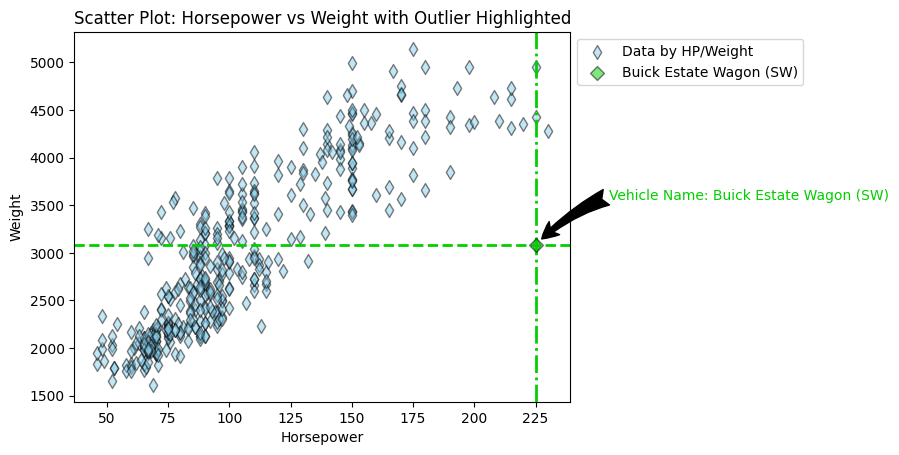

In [150]:
# fig, ax
fig, ax = plt.subplots()
ax.scatter(
	mpg["horsepower"],
	mpg["weight"],
	label="Data by HP/Weight",
	color="skyblue",
	marker="d",
	s=50,
	ec="black",
	alpha=0.5
)

# define outlier
outlier = mpg[mpg["name"] == "buick estate wagon (sw)"].iloc[0]

# mark outliers
ax.scatter(
	outlier["horsepower"],
	outlier["weight"],
	color="#03ce00",
	marker="D",
	s=50,
	ec="black",
	alpha=0.5,
	zorder=5,
	label="Buick Estate Wagon (SW)"
)

# lines for outlier
ax.axhline(y=outlier["weight"], color="#03ce00", linestyle="--", lw=2)
ax.axvline(x=outlier["horsepower"], color="#03ce00", linestyle="dashdot", lw=2)

# annotation outlier with arrow, shrink & connectionstyle
ax.annotate(
	f"Vehicle Name: Buick Estate Wagon (SW)",
	xy=(outlier["horsepower"], outlier["weight"]),
	xytext=(outlier["horsepower"] + 30, outlier["weight"] + 470),
	textcoords="data",
	arrowprops=dict(facecolor='black',
					arrowstyle="fancy",
					mutation_scale=30,
					shrinkA=0,
					shrinkB=6,
					connectionstyle="arc3,rad=0.3"),
	color="#03ce00"
)

# settings
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.set_title("Scatter Plot: Horsepower vs Weight with Outlier Highlighted")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1.7em">Aufgabe 2:</h4>
  <hr>
      <h4 style="font-family:courier;font-size:1.3em">
Dir sind folgende Unternehmensdaten gegeben:<br><br>
Unternehmen: Volkswagen, Walmart, Amazon, Apple, Toyota<br>
Land: Deutschland, USA, USA, USA, Japan<br>
Umsatz VW in Mrd. Euro: 129.92<br>
Umsatz USA-Märkte in Mrd. Dollar: 523.964 (Walmart), 280.522 (Amazon), 264.983 (Apple)<br>
Umsatz Toyota in Billionen Yen: 30<br><br>
Erstelle daraus ein Balkendiagramm der 5 Unternehmen. Rechne dabei die Unternehmensumsätze in € um (achte drauf, dass Unternehmen in USA von $ auf € gerechnet werden müssen, Toyota muss von Yen auf € gerechnet werden); Tipp: if/else helfen dir dabei!
Erstelle in dem Balkendiagramm passende Achsenbeschriftungen und gib die Umsätze in Mrd. € auf den Ticks an.


          
          
          
 </h4>
<hr>
</div>

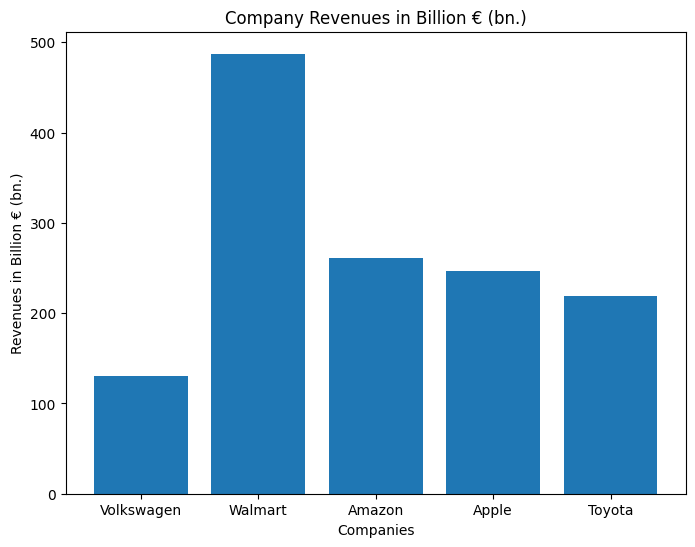

In [162]:
# company data & sales data in original currencies
# VW: in billion €, US companies: in billion $,
# Toyota: in trillion yen (1 trillion = 1e12 yen)
companies = ["Volkswagen", "Walmart", "Amazon", "Apple", "Toyota"]
countries = ["Deutschland", "USA", "USA", "USA", "Japan"]
revenues = [129.92, 523.964, 280.522, 264.983, 30]

# conversion factors
usd_to_eur = 0.93  # 1 $ ≈ 0.93 €
jpy_to_eur = 0.0073  # 1 Yen ≈ 0.0073 €

# conversion of sales into billions of €
# Toyota: conversion of trillions of yen to billions of €:
# 1 trillion yen = 1e12 yen, divided by 1e9 gives billions of yen → multiplication by 1e3
revenues_in_eur = []

# conversion with for loop
for comp, country, rev in zip(companies, countries, revenues):
	# USA
	if country == "USA":
		rev_eur = rev * usd_to_eur
	# Japan
	elif country == "Japan":
		rev_eur = rev * 1e3 * jpy_to_eur
	# Deutschland
	else:
		rev_eur = rev
	revenues_in_eur.append(rev_eur)

# creating bar chart
# bn. is a written abbreviation for billion.
# billion is the equivalent of the German Mrd.
plt.figure(figsize=(8, 6))
plt.bar(companies, revenues_in_eur)
plt.xlabel("Companies")
plt.ylabel("Revenues in Billion € (bn.)")
plt.title("Company Revenues in Billion € (bn.)")
plt.show()